In [162]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### How linear regression works:
#### Linear regression is the formula of the trendline or mean, where Y-axis is the dependant value and X-axis is the independant value. The more common formula is build up by $y = b + bX + e$, where $b$ is the intercept and the point where the regression line crosses the Y-axis. $bX$ is the slope or the increase/decrease of the formula. Finally, $e$ is the residual which makes the $y$ value 'complete' once the value does not match the slope, also known as the error).

In [163]:
df = pd.read_csv('data Mashable.csv')
df = df.dropna()
df.head(5)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


### 'Is_week'
#### I'm missing a column that combines all week publishings **(Is_week variable)**. You could argue that the zero values of **Is_weekend** are the missing **Is_week** variable, I want reflect both correlations to eachother to confirm this idea.

In [164]:
week = df.loc[:,'weekday_is_monday':'weekday_is_friday']
df['is_week'] = week.sum(axis=1)
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log,is_week
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219,1
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751,1
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091,1
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030,1
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151,1


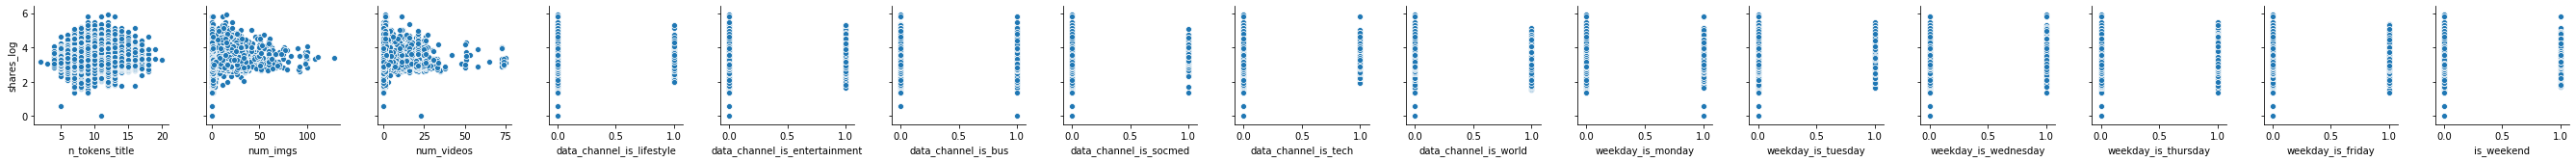

In [165]:
sns.pairplot(df, y_vars=['shares_log'], x_vars=['n_tokens_title', 'num_imgs', 'num_videos', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'is_weekend'])
plt.show()

### 'First observations'
#### the dataset is fairly clean, we see some small outliers but overall should be of too much concern. There is also no need for processing or dummy variables as each datapoint is converted from Yes/ No to 1/0.

In [210]:
df.corr().loc['shares_log',].sort_values(ascending=False)

shares_log                       1.000000
shares                           0.483322
is_weekend                       0.105919
global_subjectivity              0.093021
num_imgs                         0.085575
data_channel_is_socmed           0.085516
weekday_is_saturday              0.072644
weekday_is_sunday                0.071864
title_subjectivity               0.055161
global_sentiment_polarity        0.053199
title_sentiment_polarity         0.050216
data_channel_is_tech             0.047729
num_videos                       0.037147
data_channel_is_lifestyle        0.036926
n_tokens_content                 0.032897
weekday_is_friday                0.006309
id                              -0.003900
weekday_is_monday               -0.007843
n_tokens_title                  -0.012247
weekday_is_tuesday              -0.027738
weekday_is_thursday             -0.030329
average_token_length            -0.031730
weekday_is_wednesday            -0.032125
data_channel_is_bus             -0

### Correlations

#### the **Is_week** correlation shows a similar number to that of is_weekend, therefor confirming that indeed one of these variables is enough. Interesting enough, is_week shows the negative correlation.

#### From the pairplot we can gather visual cues when it comes back to correlation however the above function corr() provides a value from 1 to 0 (can also be seen as a %). Ontop of that I've added the dependant variable. As I want to know how all the other variables relate to that one. Finally I added sorting & could also add a head() function to make it even more efficient.

#### however, there is a side note, I still need to make sense of the variables, I can't just copy the first 5 variables. As Shares_log & Shares are without a doubt connected to the Y variable and themselves. Similar to the variable is_weekend and weekday_is_sunday, I should not include both of these in my predictive model.

#### the variables that I will use are: **'is_weekend', 'global_subjectivity', 'num_imgs', 'data_channel_is_socmed'** and finally **'title_subjectivity'** *(from what I understood, global_subjectivity does not include the title)*

#### I changed variable **data_channel_is_socmed to data_channel_is_world and got a higher R2 value, so it doesn't matter if the correlation is positive or negative for the prediction.** That's what I conclude from this.

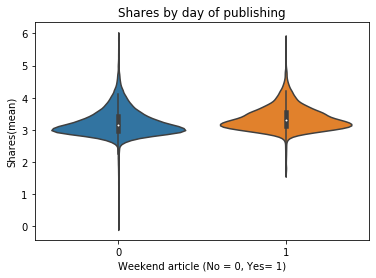

In [167]:
sns.violinplot(x='is_weekend', y='shares_log', data=df)
plt.xlabel('Weekend article (No = 0, Yes= 1)')
plt.ylabel('Shares(mean)')
plt.title('Shares by day of publishing')
plt.show()

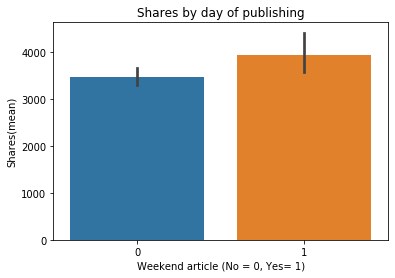

In [168]:
sns.barplot(x='is_weekend', y='shares', data=df) # estimator=sum can provide the sum of the # of shares.
plt.xlabel('Weekend article (No = 0, Yes= 1)')
plt.ylabel('Shares(mean)')
plt.title('Shares by day of publishing')
plt.show()

#### with the violinplot I wanted to see a visual difference between articles published in the weekend or week, there is a small bias towards the weekend, but very minimal. **On average** articles that are published during the weekend have more shares. Also shown a bit better by the bar chart, it doesn't show the sum, rather the mean.

In [218]:
x = df[['is_weekend', 'global_subjectivity', 'num_imgs', 'data_channel_is_world', 'title_subjectivity']]
x.index = df['id']
y = df['shares_log'] 

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) #split the data, store it into different variables
print(X_train.info())
x_train.head()#The train data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17499 entries, 20921 to 235
Data columns (total 5 columns):
is_weekend                17499 non-null int64
global_subjectivity       17499 non-null float64
num_imgs                  17499 non-null int64
data_channel_is_socmed    17499 non-null int64
title_subjectivity        17499 non-null float64
dtypes: float64(2), int64(3)
memory usage: 820.3 KB
None


,is_weekend,global_subjectivity,num_imgs,data_channel_is_world,title_subjectivity
id,,,,,
20922,1,0.451711,0,0,0.500000
4486,0,0.476976,9,0,0.100000
17756,0,0.488495,1,0,0.000000
4705,0,0.545746,23,0,0.454545
13494,0,0.507042,13,0,0.750000


In [220]:
lm = LinearRegression() #this creates a new LR model
lm.fit(x_train, y_train) #this "fits" the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
coef = pd.DataFrame(x.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
print(coef)

                               0
 0.127702             is_weekend
 0.203588    global_subjectivity
 0.003028               num_imgs
-0.127836  data_channel_is_world
 0.032906     title_subjectivity


In [222]:
b0 = lm.intercept_ #gets the intercept

b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b2 = lm.coef_[1] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b3 = lm.coef_[2] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b4 = lm.coef_[3] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b5 = lm.coef_[4] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X + {b2:.3f}X + {b3:.3f}X + {b4:.3f}X + {b5:.3f}X") #.0f formats to 2 decimals. 

The regression line is equal to y = 3.148 + 0.128X + 0.204X + 0.003X + -0.128X + 0.033X


#### $y = 3.074 + 0.127X + 0.282X + 0.004X + 0.136X + 0.040X$

#### The test data set R2 score

In [223]:
y_test_p = lm.predict(x_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.038250944919914986

#### The train data set R2 score, which is more accurate compared to the test data as it received more inputs. This could also be a signs of overfitting.

In [224]:
y_train_p = lm.predict(x_train) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_train, y_train_p)

0.04111274093070871

In [225]:
math.sqrt(mean_squared_error(y_test, y_test_p)) 

0.3981903200478722

#### with the log(10) involved this doesn't make sense to me and leaves me confused. It seems as if this claims that we can predict with 0,4 log of shares. But looking at the correlation that seems off.

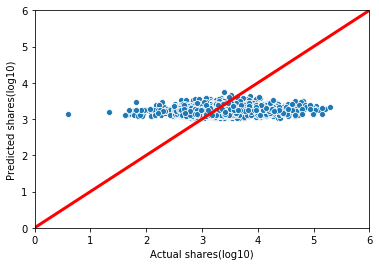

In [226]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares(log10)')
plt.ylabel('Predicted shares(log10)')
plt.xlim([0,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0,6])
plt.plot([0, 6], [0, 6], color='red', lw=3) #Plot a diagonal length
plt.show()

#### There still seems to be no correlation, the prediction we've created doesn't align with the actual shares. Even with a bigger train data set I don't see any correlation (see below).

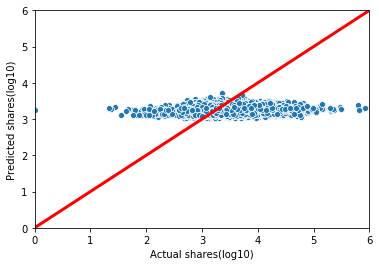

In [228]:
sns.scatterplot(y_train, y_train_p)
plt.xlabel('Actual shares(log10)')
plt.ylabel('Predicted shares(log10)')
plt.xlim([0,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0,6])
plt.plot([0, 6], [0, 6], color='red', lw=3) #Plot a diagonal length
plt.show()

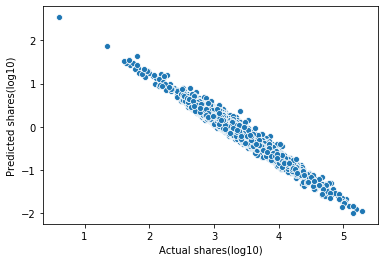

In [227]:
y_test_r = y_test_p - y_test

sns.scatterplot(y_test, y_test_r)
plt.xlabel('Actual shares(log10)')
plt.ylabel('Predicted shares(log10)')
plt.show()

#### The residuals show a similar effect, only at a ~3.4 shares(log10) we get some magazines that do connect with our predictive model. 